In [17]:
import sys

import numpy as np
from matplotlib import pyplot as plt

from scipy.stats import chi2

sys.path.append('..')
from higgs_inference.various.utils import format_number

In [8]:
thetas = np.load('../data/thetas/thetas_parameterized.npy')

# Plot function

In [39]:
def plot_neyman_distributions(filename, folder='parameterized', n_bins=51):
    
    thetas_plot = [0,9]
    thetas_labels = ['SM', 'T', 'NT', 'X']
    
    distributions = np.load('../results/' + folder
                           +'/neyman_llr_vs_mle_distributions_'
                           + filename + '.npy')
    observeds = np.load('../results/' + folder
                           +'/neyman_llr_vs_mle_observeds_'
                           + filename + '.npy')
    p_values = np.load('../results/' + folder
                      + '/p_values_' + filename + '.npy')
    
    plt.figure(figsize=(8,4))
    
    for i, (t, label) in enumerate(zip(thetas_plot, thetas_labels)):
        
        xmin = min(np.percentile(distributions[t], 1.), np.percentile(observeds[t], 5.))
        xmax = max(np.percentile(distributions[t], 99.), np.percentile(observeds[t], 95.))
        xmin = xmin - (xmax - xmin) * 0.2
        xmax = xmax + (xmax - xmin) * 0.2
        
        xvals = np.linspace(xmin, xmax, 200)
        
        plt.subplot(1, 2, i+1)
        plt.hist(distributions[t],
                 bins=n_bins, range=(xmin, xmax), density=True,
                 color='C0', alpha=0.2)
        plt.hist(observeds[t],
                 bins=n_bins, range=(xmin, xmax), density=True,
                 color='C1', alpha=0.2)
        plt.hist(distributions[t],
                 bins=n_bins, range=(xmin, xmax), density=True,
                 color='C0', histtype='step')
        plt.hist(observeds[t],
                 bins=n_bins, range=(xmin, xmax), density=True,
                 color='C1', histtype='step')
        
        plt.plot([], [], '-', c='C0', label=r'$p(q(\theta_{' + label + r'}) | \theta_{' + label + r'})$')
        plt.plot([], [], '-', c='C1', label=r'$p(q(\theta_{' + label + r'}) | \theta_{SM})$')
        plt.plot(xvals, chi2.pdf(xvals, 2), ls='--', c='C2', label=r'$\chi^2$ distribution')
        plt.plot([], [], ' ', label=r'$p = ' + format_number(p_values[t]) + '$')
        plt.legend()
        
        plt.xlabel(r'$q(\theta_{' + label + r'})$')
        plt.ylabel(r'$p(q(\theta_{' + label + r'}))$')
        plt.xlim(xmin, xmax)
        plt.ylim(0., None)

    plt.tight_layout()
    plt.savefig('../figures/neyman/neyman_distribution_' + filename + '.pdf')

# Go

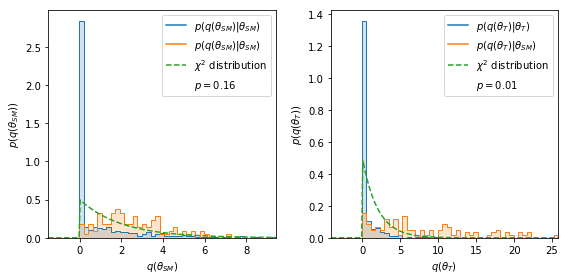

In [40]:
plot_neyman_distributions('regression', 'point_by_point')

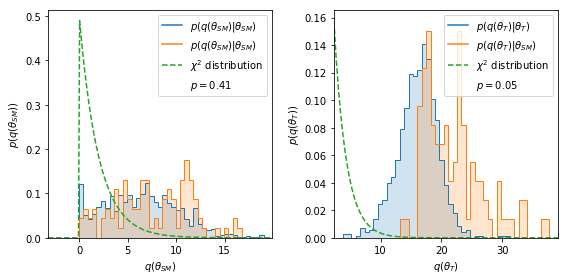

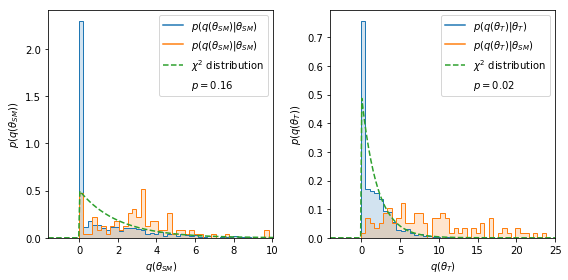

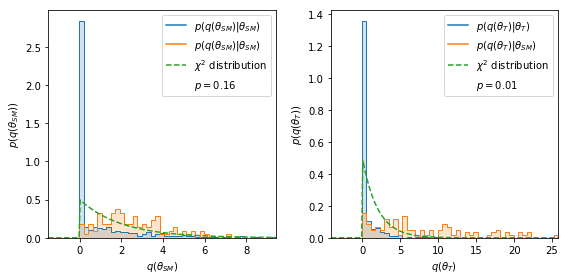

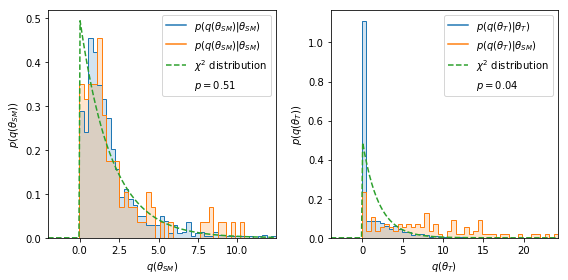

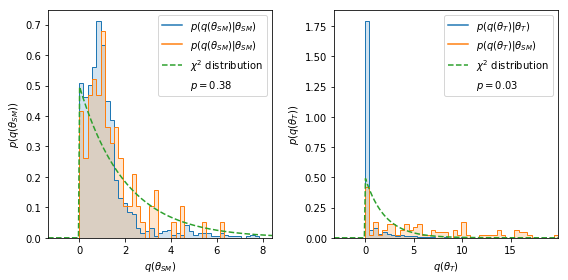

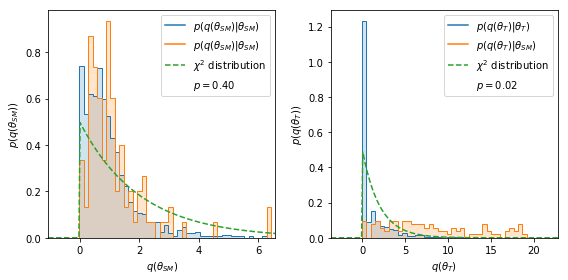

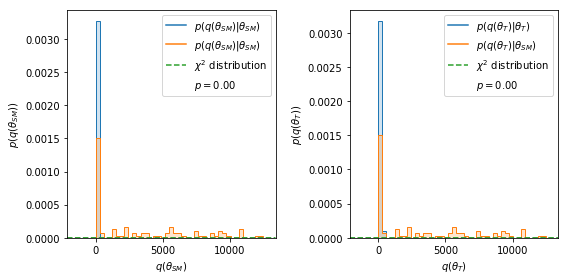

In [41]:
plot_neyman_distributions('carl', 'point_by_point')
plot_neyman_distributions('carl_calibrated', 'point_by_point')
plot_neyman_distributions('regression', 'point_by_point')

plot_neyman_distributions('carl', 'parameterized')
#plot_neyman_distributions('carl_calibrated', 'parameterized')
plot_neyman_distributions('score', 'parameterized')
#plot_neyman_distributions('score_calibrated', 'parameterized')
plot_neyman_distributions('combined', 'parameterized')
#plot_neyman_distributions('combined_calibrated', 'parameterized')
#plot_neyman_distributions('regression', 'parameterized')
#plot_neyman_distributions('combinedregression', 'parameterized')

plot_neyman_distributions('scoreregression', 'score_regression')
#plot_neyman_distributions('scoreregression_calibrated', 'score_regression')